<a href="https://colab.research.google.com/github/d-melamed/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/DM_LS_DS_122_Chi2_Tests_Assignment_No_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Practice Chi-square Tests

###Dataset description:

Slasher movies thrill audiences by portraying a lone antagonist (typically male) who attacks innocent victims with extreme violence and without apparent motive. However, this exciting (if gory) subgenre of horror film is criticized by those who view the violence as being used to “punish” female characters who engage in sexual activity during the film. To test this claim, study authors randomly sampled 50 North American slasher films released from 1960 to 2009 and coded the 485 characters appearing in them as being male or female, involved in sexual activity or not, and if they survived the film or not1. The data appears in the Slasher.csv dataset. In this project, we are going to answer a slightly simpler question: Are female characters in slasher films more likely to be "murdered" than male characters?

Source: A. Welsh (2010). "On the Perils of Living Dangerously in the Slasher Horror Film: Gender Differences in the Association Between Sexual Activity and Survival," Sex Roles, Vol. 62 pp. 762-773

You can find the Slasher.csv file here:

<https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Slasher.csv>





### 1) Load the Slasher.csv dataset in a new dataframe.



In [2]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

In [1]:
# YOUR WORK HERE

! wget 'https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Slasher.csv'

--2020-09-08 19:26:40--  https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Slasher.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5256 (5.1K) [text/plain]
Saving to: ‘Slasher.csv’

Slasher.csv         100%[===================>]   5.13K  --.-KB/s    in 0s      

2020-09-08 19:26:40 (64.9 MB/s) - ‘Slasher.csv’ saved [5256/5256]



In [3]:
df = pd.read_csv('/content/Slasher.csv')
df.head()

,ID,Gender,Activity,Survival
0,1,1,1,1
1,2,1,1,1
2,3,1,1,1
3,4,1,1,1
4,5,1,1,1


###2) Display the top 5 rows of the dataframe to take a look at the variable names and values.

In [6]:
# YOUR WORK HERE
df.head()

,ID,Gender,Activity,Survival
0,1,1,1,1
1,2,1,1,1
2,3,1,1,1
3,4,1,1,1
4,5,1,1,1


The variable codes are:

ID = Character ID

Gender = Character gender.  0 = female, 1 = male

Activity = Character was portrayed as engaged in sexual activity.  0 = no, 1 = yes

Survival = Character survival in the film. 0 = did not survive, 1 = survived

###3) Calculate the frequency and relative frequency of male and female characters in this set of slasher films.  Describe your results in a sentence or two.

In [8]:
# YOUR WORK HERE

gender = pd.crosstab(index=df['Gender'], columns='count')

gender

col_0,count
Gender,
0,263
1,222


In [9]:
gender/gender.sum()*100

col_0,count
Gender,
0,54.226804
1,45.773196


Describe your results here.

***There are slightly more female characters than male characters in the Slasher film data.***

###4) Calculate the frequency and relative frequency of character survival in this set of slasher films.  Describe your results in a sentence or two.

In [10]:
survival = pd.crosstab(index=df['Survival'], columns="count")

survival

col_0,count
Survival,
0,400
1,85


In [12]:
survival/survival.sum()*100

col_0,count
Survival,
0,82.474227
1,17.525773


Describe your results here.

***Most characters (over 80%) in slasher films end up dying***

###5) Calculate the joint distribution of character sex and movie survival. Add the table margins.  

Hint: If you are working off of the in-class examples, it will be helpful to include character sex as the index variable. 

Describe your results in a sentence or two.

In [21]:
# YOUR WORK HERE

JD_gender = pd.crosstab(df['Gender'], df['Survival'], margins=True)

JD_gender

Survival,0,1,All
Gender,,,
0,228,35,263
1,172,50,222
All,400,85,485


Describe your results here.

***For the most part, there is a similar distribution between the genders of characters that end up dead. Slighly more males seem to be surviving***

###6) Calculate the distribution of survival conditional on character sex.
Hint: If you are working off of the in-class examples, it will be helpful to include character sex as the index variable. 

Describe your results in a sentence or two.

In [24]:
# YOUR WORK HERE

con_dis = pd.crosstab(df['Gender'], df['Survival'], margins=True, normalize='index')*100
con_dis

Survival,0,1
Gender,,
0,86.692015,13.307985
1,77.477477,22.522523
All,82.474227,17.525773


Describe your results here.

***More males are surviving in slasher films***

###7) Identify the appropriate null and alternative hypotheses to test for a statistically significant relationship between character sex and survival. 

**Ho:** There is no relationship between character sex and survival in slasher films.

**Ha:** There is a relationship between character sex and survival in slasher films.

### 8) Perform the chi-square test above using `stats.chi2_contingency()` and output the p-value.


In [25]:
# YOUR WORK HERE

g, p, dof, expected = chi2_contingency(pd.crosstab(df['Gender'], df['Survival']))

p

0.011104692591139975

### 9) Interpret your p-value in 8) at the 0.05 significance level, and summarize your results in a sentence or two.

***We reject the null hypothesis since the p-value is 0.011. There is a relationship between character sex and survival.***



### 10) Create a side-by-side bar plot to illuatrate the relationship between character sex and survival in Slasher movies.  Sum up your overall results in a sentence or two.

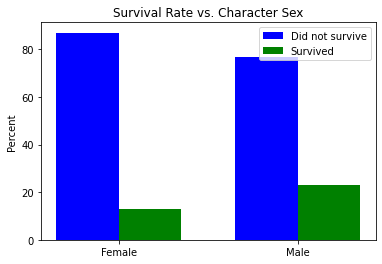

In [26]:
# YOUR WORK HERE

N = 2

Died = (87, 77)
Survived = (13, 23)

ind = np.arange(N)

width = 0.35

#create plot
fig, ax = plt.subplots()
rects1 = ax.bar(ind, Died, width, color='blue')
rects2 = ax.bar(ind +width,  Survived, width, color='green')

#labels
ax.set_ylabel('Percent')
ax.set_title('Survival Rate vs. Character Sex')
ax.set_xticklabels(('Female', 'Male'))
ax.set_xticks(ind + width/2)

ax.legend((rects1[0], rects2[0]), ('Did not survive', 'Survived'))

***Most character, both males and females, do not surivive in slasher films, however, it seems less females survive compared to males.***

## Stretch Goals:

###1. Explore the concept of an odds ratio

Another way to quantify the relationship between two categorical variables is by calculating the odds ratio, which is the ratio of the odds of an event happening in one group to the odds of the event happening in another group.

[Lots more about the odds ratio](https://en.wikipedia.org/wiki/Odds_ratio).

We can use Python to calculate the odds of surviving a slaser movie for female compared to male characters.

You can find more information about calculating the odds ratio for a 2x2 table in Python [here](https://www.statsmodels.org/stable/contingency_tables.html).  Scroll down to the section labeled "A Single 2x2 Table".

Calculate the odds ratio comparing the odds of movie survival in female compared to male characters.  Interpret what this number tells you about the likelihood of male and female characters surviving the film.


In [27]:
# YOUR WORK HERE
import statsmodels.api as sm

table = pd.crosstab(df['Gender'], df['Survival'])

t22 = sm.stats.Table2x2(table)

print(t22.summary())



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


               Estimate   SE   LCB   UCB  p-value
-------------------------------------------------
Odds ratio        1.894       1.177 3.046   0.008
Log odds ratio    0.639 0.242 0.163 1.114   0.008
Risk ratio        1.119       1.027 1.219   0.010
Log risk ratio    0.112 0.044 0.027 0.198   0.010
-------------------------------------------------


In [28]:
t22 = sm.stats.Table2x2(table.T)

print(t22.summary())

               Estimate   SE   LCB   UCB  p-value
-------------------------------------------------
Odds ratio        1.894       1.177 3.046   0.008
Log odds ratio    0.639 0.242 0.163 1.114   0.008
Risk ratio        1.384       1.059 1.810   0.017
Log risk ratio    0.325 0.137 0.057 0.593   0.017
-------------------------------------------------


Sum up your results in a sentence or two.

***Character sex is not independent of survival since the odds ratio is greater than 1 (1.894). Female characters are almost twice as likely to die compared to males***

***


### 2. Learn about Simpson's Paradox

[Simpson's Paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox#:~:text=Simpson's%20paradox%2C%20which%20goes%20by,when%20these%20groups%20are%20combined.) occurs when a trend that appears in separate groups disappears or reverses when those groups are combined.  

Create a scenario where Hopsital A has a lower overall mortality rate than Hospital B but has a higher mortality rate if cases are separated into two groups: high risk and low risk.


In [32]:
# YOUR WORK HERE
sp = pd.read_csv("/content/hospitals.csv")
sp.head()

,Hospital,Admissions,Deaths,High Risk,Low Risk
0,A,500,17,8,9
1,B,500,20,14,6


Sum up your results in a sentence or two.

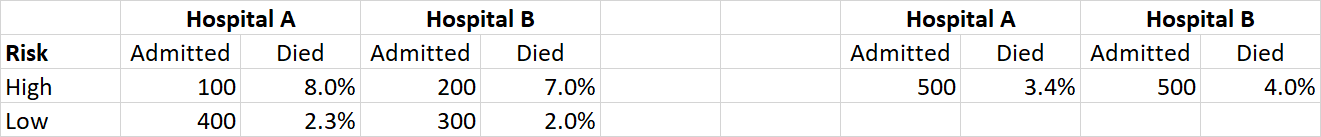